### Project Overview 
- YOuy goal for this project oit to take the provided data set and reduce the Dinamsions of the features
- Remember -> the Anuto Encoder does not remove specific features but actually takes htepercentage of each feature that is more related to the target

#### Project Approach 
- Seperate the Auto-Encoder into two parts , Encoder and Decoder

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

###  Use Sklearn to make a data set
- n_samples = How many rows do you want in data set
- n_features = number of columns 
- centers - Ho many clusters* binary data set)
- cluster_std - hpoemuch oist do you want th the features
- Random state - to ge the same as anothrer data personelle

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=101)

In [6]:
X,y = data

In [9]:
X.shape

(300, 2)

In [8]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

### Adding a third feature that is just noise
- random noise for each row

In [13]:
np.random.seed(seed = 101)
z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)

In [14]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

### We ill create a data frame for each feature

In [16]:
feat = pd.DataFrame(X)

In [18]:
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


### Adding the Z_noise to series

In [19]:
feat = pd.concat([feat, z_noise], axis=1)

In [21]:
feat.columns = ["x1","x2","x3"]

In [23]:
feat.corr()

,x1,x2,x3
x1,1.000000,0.943380,0.078159
x2,0.943380,1.000000,0.050756
x3,0.078159,0.050756,1.000000


### observing difference in Dimensions
- clear seperation 
- will visualize in a 3D plot

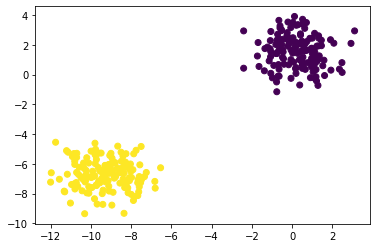

In [25]:
plt.scatter(feat["x1"], feat['x2'], c=y)

In [26]:
from mpl_toolkits.mplot3d import axes3d

### 3d Figure 

In [32]:
%matplotlib notebook

<IPython.core.display.Javascript object>


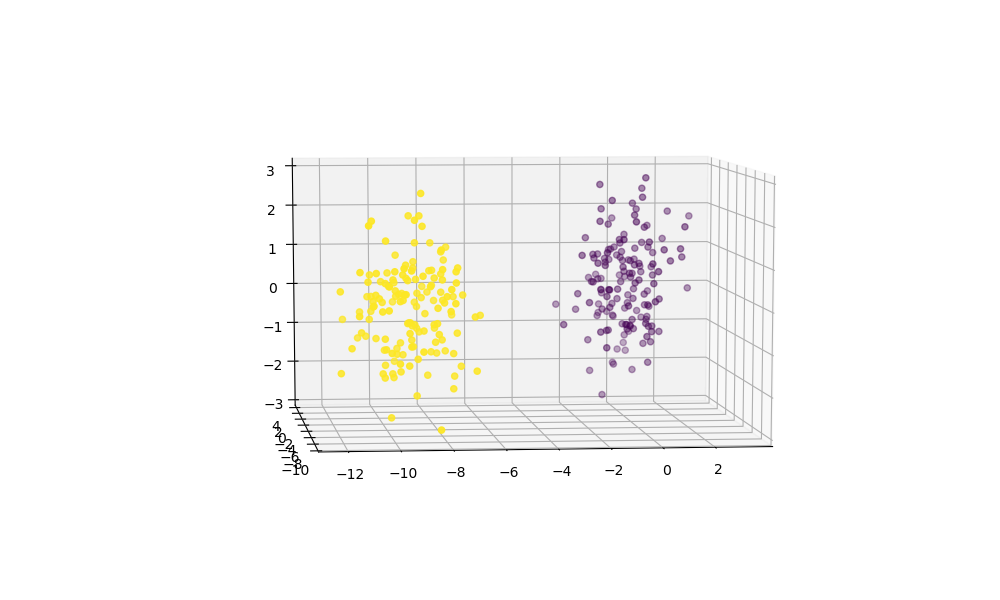

In [34]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(feat["x1"], feat["x2"], feat["x3"], c = y)

### We will create an auto Encoder
- THis will try to filter out which featire is important and which are not

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### SGD 
- Stochastic gradient descent allows yo uto play with the learning rate 
- to assist the autoencoder
- if the encoder is having trouble finding what featires are important(slow it down)

In [37]:
from tensorflow.keras.optimizers import SGD

#3->2->3

### Encoder

In [41]:
encoder = Sequential()
encoder.add(Dense(units = 2, activation = "relu", input_shape = [3]))

## Decoder

In [42]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation = "relu", input_shape = [2]))

### Auto encoder
- We train together to allow the encoder to learnd the best way to reduce the input shape to the unit size

In [44]:
auto_encoder = Sequential([encoder, decoder])

In [45]:
auto_encoder.compile(loss = "mse", optimizer=SGD(learning_rate = 1.5))

### Last thing we need to do is Scale
 - Since there is no right or wrong answer of how to reduce dimansions we will fit transform the entire data set

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scalar = MinMaxScaler()

In [48]:
scaled_data = scalar.fit_transform(feat)

### it the auto endoder

In [49]:
auto_encoder.fit(scaled_data,scaled_data, epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 3ms/sample - loss: 0.1862
Epoch 2/5
300/300 [==============================] - 0s 86us/sample - loss: 0.1400
Epoch 3/5
300/300 [==============================] - 0s 76us/sample - loss: 0.1130
Epoch 4/5
300/300 [==============================] - 0s 95us/sample - loss: 0.1320
Epoch 5/5
300/300 [==============================] - 0s 101us/sample - loss: 0.1164


In [50]:
encoded_2d = encoder.predict(scaled_data)

### Encoder Performance 
- Encoder has taken the 4 dimansion and reduced it to 2 

In [52]:
encoded_2d.shape

(300, 2)

<IPython.core.display.Javascript object>


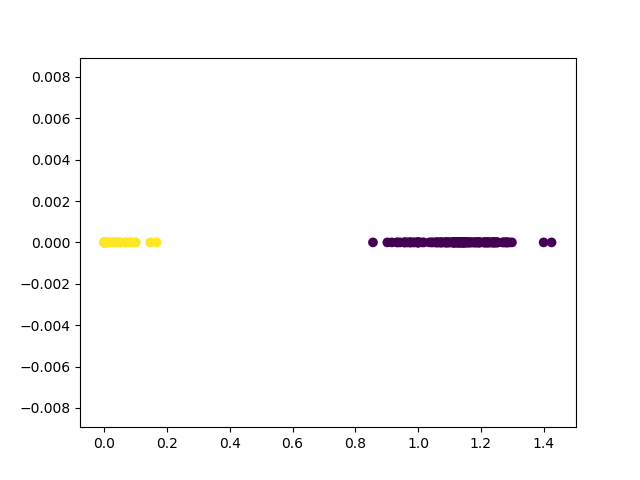

In [54]:
plt.scatter(encoded_2d[:,0], encoded_2d[:,1], c = y)